# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit

# Importing Data and Visualisastion

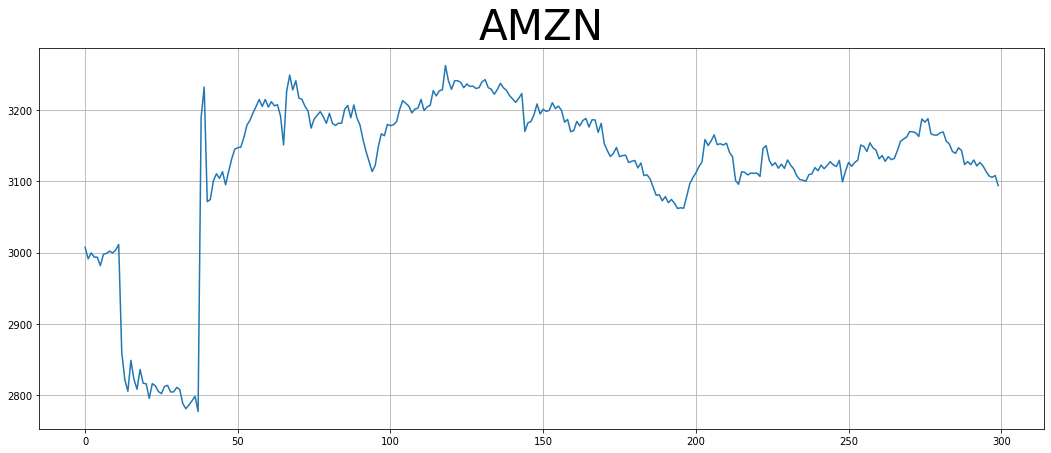

In [18]:
SEC_KEY = '7mi6lnaTynfrzxfDYyYUarBpUJ35sSgVEVIj6RZG'
PUB_KEY ='PKDL8E9SBYH9GYYXXZNL'
BASE_URL ='https://paper-api.alpaca.markets'
symb = "AMZN"
api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
df = api.get_barset(symb, TimeFrame(15, TimeFrameUnit.Minute), limit=300).df  # Get one bar object for each of the past 5 minutes
df=df[symb]
df['Close']=df['close']
df['High']=df['high']
df['Low']=df['low']
df['Open']=df['open']
df['Volume']=df['volume']
plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# Macd Indicator and visualisation

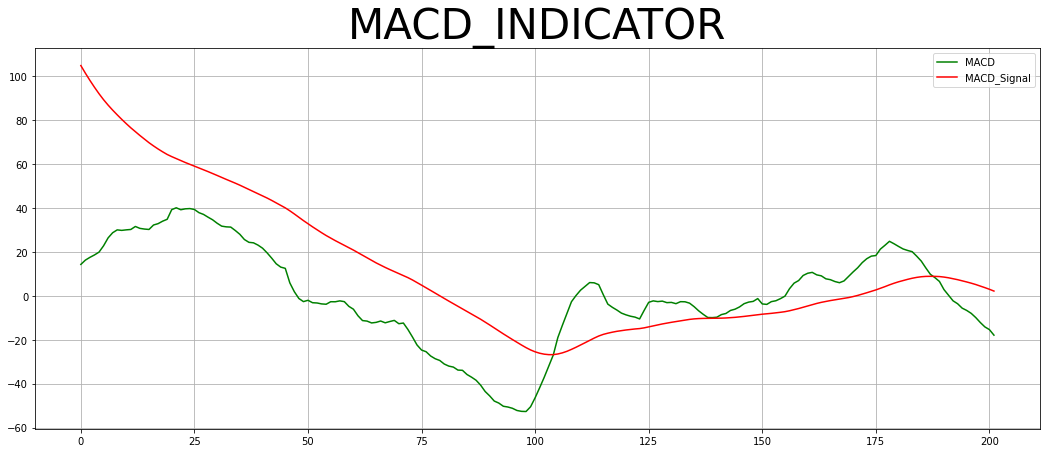

In [19]:
macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=50, signalperiod=50)

df['macd'] = macd
df['macd_signal'] = macdsignal
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.figure(figsize=(18,7))
plt.plot(df['macd'],color='g',label='MACD')
plt.plot(df['macd_signal'],color='r',label='MACD_Signal')
plt.legend()
plt.title('MACD_INDICATOR',size=42)
plt.grid()
plt.show()

# Empty Arrays


In [20]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None

# Decision Making Process

Profit = 2
Stop_loss = 0


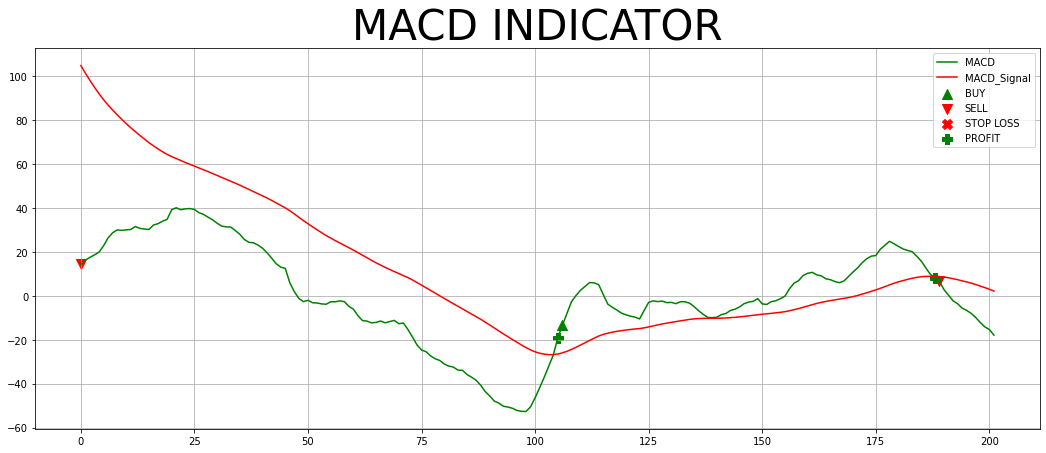

In [21]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i] > df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['macd'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['macd'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i]<df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['macd'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['macd'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i]<df['macd_signal'][i]:
        if df['macd'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['macd'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['macd'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['macd'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['macd'],color='g',label='MACD')
plt.plot(df['macd_signal'],color='r',label='MACD_Signal')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.legend()
plt.title('MACD INDICATOR',size=42)
plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())

In [22]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None

Profit = 1
Stop_loss = 1
PROFITIBLITY 50.0


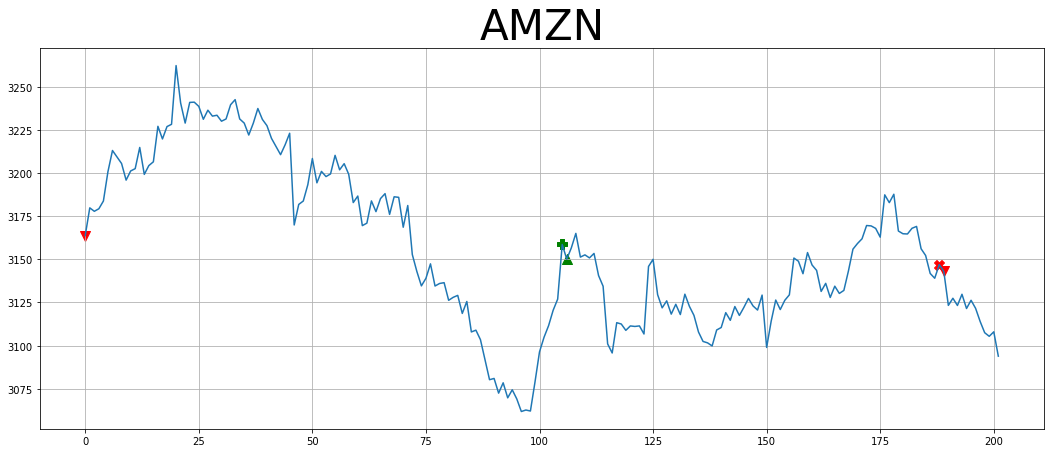

In [23]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i]>df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['Close'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i] <df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['Close'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i] < df['macd_signal'][i]:
        if df['Close'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['Close'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Buy=None
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['Close'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['Close'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Sell=None
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['Close'])

plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.title(symb,size=42)

plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")